In [117]:
import sys
sys.path.append('/eos/home-i00/l/lkoller/SWAN_projects/data analysis 2024/commands')

from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import os
from readTrc_4CH import Trc
from PIL import Image
from tqdm import tqdm
from cluster_finder import cfinder
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",14)

In [246]:
df = pd.read_csv('/eos/user/l/lkoller/GBAR/data24/datafile24.txt', delimiter = '\t')
#df = df[df.run_type == 5]
df = df[df.run == 681]
df = df[df.MCP5 != 'None']
fl = list(df.MCP5)

In [132]:
dark_file = '/eos/experiment/gbar/pgunpc/data/24_07_25/PCO-SwY_exp_10_us_1721936860.877.dark.tif'
dark_arr = np.array(Image.open(dark_file))
thresh = np.average(dark_arr) + 4*np.std(dark_arr)

In [247]:
all_images_av = np.zeros((1040, 1392)) #array with same shape as MCP5 pictures with 0 everywhere, put sum of all MCP5 pics in this array

for i in tqdm(range(len(fl))):
    temp_arr = np.array(Image.open(fl[i]))
    all_images_av += temp_arr/len(fl)

100%|██████████| 359/359 [00:04<00:00, 78.74it/s]


In [207]:
all_clusters_av = np.zeros((1040, 1392)) #array with same shape as MCP5 pictures with 0 everywhere, put sum of all MCP5 pics in this array

for i in tqdm(range(len(fl))):
    temp_arr = np.array(Image.open(fl[i]))
    temp_arr[temp_arr < thresh] = 0
    all_clusters_av += temp_arr/len(fl)

100%|██████████| 359/359 [00:04<00:00, 86.89it/s]


In [218]:
all_clusters_num = np.zeros((1040, 1392)) #array with same shape as MCP5 pictures with 0 everywhere, put sum of all MCP5 pics in this array

for i in tqdm(range(len(fl))):
    temp_arr = np.array(Image.open(fl[i]))
    temp_arr[temp_arr < thresh] = 0
    temp_arr[temp_arr >= thresh] = 1
    all_clusters_num += temp_arr

100%|██████████| 359/359 [00:04<00:00, 77.98it/s]


In [219]:
np.max(all_clusters_num)

113.0

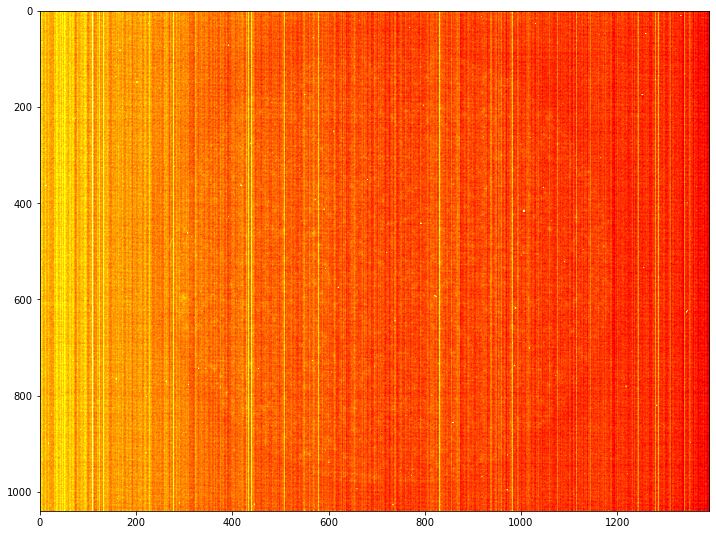

In [249]:
fig = plt.figure(figsize = (12,12))
plt.imshow(all_images_av, cmap = 'hot', vmin = 795, vmax = 818)

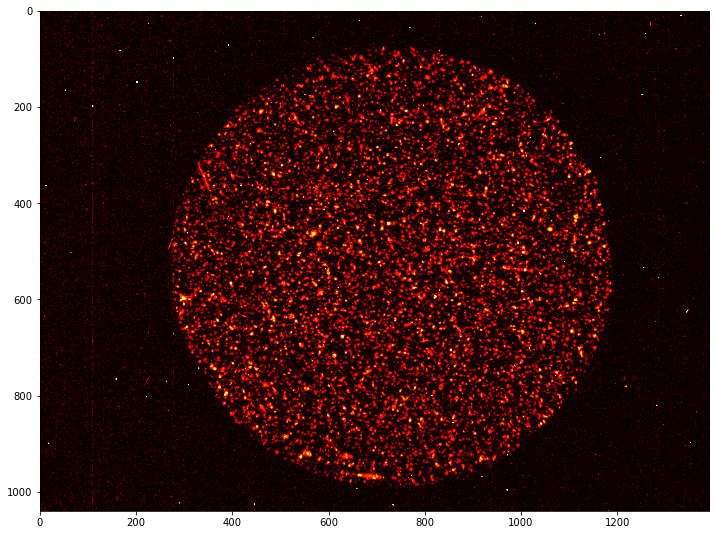

In [204]:
fig = plt.figure(figsize = (12,12))
plt.imshow(all_clusters_av, cmap = 'hot', vmin = 0, vmax = 8)

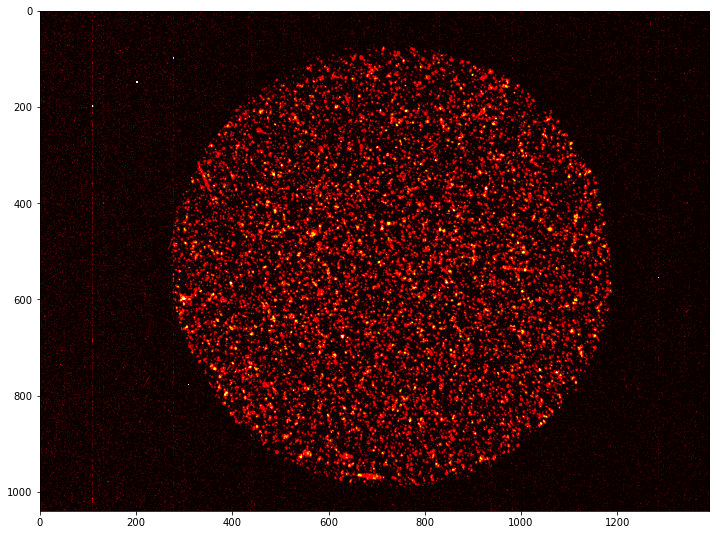

In [234]:
fig = plt.figure(figsize = (12,12))
plt.imshow(all_clusters_num, cmap = 'hot', vmin = 0, vmax = 3)

In [225]:
len([val for bal in all_clusters_num for val in bal if val > 3])

138

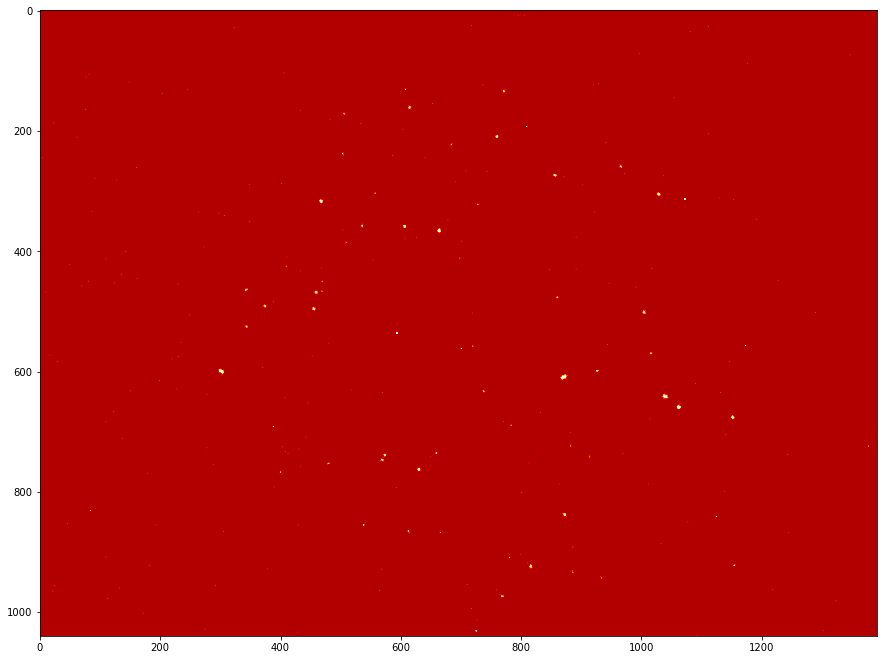

In [133]:
pos = 0
arr = np.array(Image.open(fl[pos]))
arr[arr < thresh] = 700

plt.figure(figsize = (15,15))
plt.imshow(arr, cmap = 'hot', vmin = 600, vmax = 1000)

In [68]:
df

,Date,Time,Datetime,run_type,run,run_mode,event_number,DAQ,pbar_trap,positron,MCP1,MCP2,MCP3,MCP3.5,MCP4,MCP5,MCP7,Waveform_12bit,CMOS_Tracker,DRS4,Positron_Waveform,SD,LyA,SD_LyA,Cy_Des,NE00_I,NE50_I,NE00_Bm1,NE00_Bm2,NE00_Bm3,NE50_Bm1,NE50_Bm2,Int,Valve_in,MCP_in,MW_power,H-sou_pressure,cube_pressure,RC_pressure,MW_pressure,SwY_pressure,LyA_pressure,Main_delay,PCOs_delay,LyA_delay,Laser_delay,FC_current,MCP4_current,MCP5_current,St_dec_up,St_dec_dw,St_dec_ri,St_dec_le,St_Cub_up,St_Cub_dw,St_Cub_ri,St_Cub_le,St_RC1_up,St_RC1_dw,St_RC1_ri,St_RC1_le,St_RC2_up,St_RC2_dw,St_RC2_ri,St_RC2_le,St_RC3_up,St_RC3_dw,St_RC3_ri,St_RC3_le,St_Al1_up,St_Al1_dw,St_Al1_ri,St_Al1_le,St_Al2_up,St_Al2_dw,St_Al2_ri,St_Al2_le,QT_RC1_+,QT_RC1_-,QT_RC2_+,QT_RC2_-,QT_RC3_+,QT_RC3_-,SwY_1_+,SwY_1_-,SwY_3_+,SwY_3_-,EL_pT_in,EL_pT_1,EL_pT_2,EL_pT_3,EL_pT_4,EL_RC_in,EL_SwY_+,EL_Al1_+,EL_Al2_+,EL_Al3_+,Ly_MCP_1,Ly_MCP_2,Ly_MCP_3,Ly_MCP_4,Qnch_+,Qnch_-,TgDefl_+,H-Defl_+,H-Cor1_-,H-Cor1-,1_phos_+,1_mcp_+,2_phos_+,2_mcp_+,3_phos_+,3_mcp_+,3.5_grid_-,3.5_phos_+,3.5_mcp_+,4_phos_+,4_mcp_+,5_phos_+,5_mcp_+,6_phos_+,6_mcp_+,7_phos_+,7_mcp_+,Sci_1_-,Sci_2_-,H_offs,target_pos,front_bias,mw_amp_curr,hfs_temp,hfs_freq,hfs_pow,sc_temp,sc_freq,sc_pow,empty_1,empty_2,empty_3,empty_4,empty_5,empty_6,empty_7,empty_8
13242,24_07_23,1.721725e+09,2024-07-23 11:04:29.913000,5,666.0,NaN,1,0.0,0,0,None,None,None,None,None,/eos/experiment/gbar/pgunpc/data/24_07_23/PCO-...,None,/eos/experiment/gbar/pgunpc/data/24_07_23/WF12...,None,None,None,None,None,None,None,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.000,872451015.0,16.0,-4.194456e-08,5.140000e-10,1.120000e-08,2.580000e-09,2.810000e-09,1.010000e-09,3.340000e-09,0.000902,0.001002,0.00101,0.000999,4.418109e-07,2.449075e-07,0.000087,49.95775,-49.98351,9.959093,-9.968986,0.044101,0.025969,0.057207,0.063431,0.067665,0.101079,0.039427,0.075239,-0.013851,-0.046945,-0.036483,-0.094365,-0.007947,0.029450,0.014312,0.020348,0.019135,0.031489,0.025260,0.025463,0.031118,0.015463,0.017386,0.018204,0.008574,0.027739,-0.003794,0.050761,0.044239,0.114392,-0.004909,0.019878,0.084979,0.010841,-1550.009,-3300.003,-2199.994,-1500.000,0.344790,0.061871,-0.075553,-0.243859,-0.165848,-0.418019,-0.777184,-0.719831,-0.73301,-0.767342,-0.004203,-0.147833,-0.024644,-0.044975,-0.763885,-0.763802,0.10218,-0.024289,-0.013267,-0.002793,-0.016155,-0.015310,0.049395,-0.008299,-0.034693,-0.127857,-0.014161,3999.999,2250.000,-0.146576,-0.154200,0.006247,-0.042983,-0.752161,-0.741825,0.000103,93.0,0.0,0.0,50.1,1.162000e+09,-100.0,49.8,9.100000e+08,-100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13243,24_07_23,1.721726e+09,2024-07-23 11:06:25.631000,5,666.0,NaN,2,0.0,0,0,None,None,None,None,None,/eos/experiment/gbar/pgunpc/data/24_07_23/PCO-...,None,/eos/experiment/gbar/pgunpc/data/24_07_23/WF12...,None,None,None,None,None,None,None,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.000,872451015.0,16.0,-2.127608e-07,5.130000e-10,1.120000e-08,2.580000e-09,2.810000e-09,1.010000e-09,3.340000e-09,0.000902,0.001002,0.00101,0.000999,4.392920e-07,2.524265e-07,0.000087,49.96009,-49.98186,9.960644,-9.966803,0.050575,0.032694,0.056957,0.064677,0.071156,0.099582,0.045658,0.080724,-0.011639,-0.017451,-0.046803,-0.056779,-0.022687,0.030925,0.018000,0.029931,0.018637,0.033481,0.025260,0.024467,0.030620,0.014218,0.013154,0.014970,0.024053,0.024789,-0.000845,0.050024,0.044976,0.118818,-0.007859,0.021353,0.085717,0.004943,-1550.000,-3300.002,-2200.003,-1500.005,0.302758,0.061871,-0.075553,-0.243859,-0.170772,-0.413098,-0.777184,-0.719831,-0.73301,-0.767342,-0.004203,-0.147833,-0.023907,-0.057344,-0.763885,-0.763802,0.10218,-0.024289,-0.011783,-0.002793,-0.013193,-0.012343,0.064227,-0.006817,-0.031733,-0.131812,-0.014161,4000.001,2250.003,-0.150536,-0.155189,-0.001161,-0.052865,-0.752161,-0.741825,0.000103,93.0,0.0,0.0,50.1,1.162000e+09,-100.0,49.8,9.100000e+08,-100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13244,24_07_23,1.721726e+09,2024-07-23 11:08:24.435000,5,666.0,NaN,3,0.0,0,0,None,None,None,None,None,/eos/experimen